# Week 8 Multi-Class Logistic Regression - Student Performance Analysis

## Learning Objectives:
* Understand multiclass classification
* Make predictions using multiclass classification
* Applying Machine Learning Process

## Dataset

 In this notebook, we will work on a Student Performance dataset and build a multi-class logistic regression model to predict student grade classes based on various academic and personal factors.

 The dataset contains information about student demographics, study habits, support systems, and extracurricular activities. Our goal is to predict the grade class (A, B, C, D, F) that a student will achieve based on these factors.

The dataset features include:
 - **Age**: Student's age (15-18 years)
 - **Gender**: Student's gender (0=Female, 1=Male)
 - **Ethnicity**: Student's ethnic background (0-3 categories)
    - 0: Caucasian
    - 1: African American
    - 2: Asian
    - 3: Other

 - **ParentalEducation**: Level of parental education (0-4 levels)
    - 0: None
    - 1: High School
    - 2: Some College
    - 3: Bachelor's
    - 4: Higher

 - **StudyTimeWeekly**: Weekly study time in hours, ranging from 0 to 20.
 - **Absences**: Number of absences during the school year, ranging from 0 to 30.
 - **Tutoring**: Tutoring status, where 0 indicates No and 1 indicates Yes.
 - **ParentalSupport**: The level of parental support, coded as follows:
    - 0: None
    - 1: Low
    - 2: Moderate
    - 3: High
    - 4: Very High

 - **Extracurricular**: Participation in extracurricular activities, where 0 indicates No and 1 indicates Yes.
 - **Sports**: Participation in sports, where 0 indicates No and 1 indicates Yes.
 - **Music**: Participation in music activities, where 0 indicates No and 1 indicates Yes.
 - **Volunteering**: Participation in volunteering, where 0 indicates No and 1 indicates Yes.
 - **GPA**: Grade Point Average on a scale from 2.0 to 4.0, influenced by study habits, parental involvement, and extracurricular activities.

 The target variable is **GradeClass** with 5 possible values:
 - **0**: Grade 'A' (GPA >= 3.5)
 - **1**: Grade 'B' (3.0 <= GPA < 3.5)
 - **2**: Grade 'C' (2.5 <= GPA < 3.0)
 - **3**: Grade 'D' (2.0 <= GPA < 2.5)
 - **4**: Grade 'F' (GPA < 2.0)
   
   
 Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a **TODO**.

In [2]:
from google.colab import files
uploaded = files.upload()

Saving student_performance_test_data.csv to student_performance_test_data.csv
Saving student_performance_train_data.csv to student_performance_train_data.csv


## Create Multiclass Logistic Regression Model

The target for your model is **GradeClass**. You will predict which grade a student will achieve based on their academic and personal characteristics using multiclass logistic regression. The reason we use multiclass classification for this problem is becuase our target variable has more than 2 classes, which is different from the binary logistic regression you learned about in Week 6.

This week, we won't give you all of the individual steps that you need to take in the code. It is up to you to determine the right steps to take based on what you've learned throughout the 100 Level.

All of your model building will use the ```student_performance_train_data.csv``` data included. You'll use ```student_performance_test_data.csv``` later on.

Here are the recommended steps:
1. Perform EDA
2. Prepare the data for machine learning, including any data cleaning or feature engineering.
3. Train a Multiclass Logistic Regression model.
4. Assess the model's performance using accuracy metrics that you've learned about.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv("student_performance_train_data.csv")

**EDA**

In [6]:
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1381,18,1,2,1,3.772645,7,0,2,1,1,0,1,2.525116,2.0
1,1227,15,0,2,1,11.448155,19,0,2,0,0,0,0,0.881866,4.0
2,2076,15,1,1,2,19.570119,13,0,1,0,0,0,0,2.096645,3.0
3,1716,18,1,0,2,10.071401,20,0,4,0,0,0,0,1.321427,4.0
4,2823,18,0,1,1,2.158491,29,1,3,1,1,1,1,0.992297,4.0


In [9]:
df.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000
mean,2199.971924,16.464755,0.515532,0.866786,1.775388,9.696178,14.624253,0.301075,2.140382,0.378136,0.305257,0.198327,0.154719,1.899124,2.990442
std,686.115347,1.120483,0.499908,1.030118,0.988743,5.713622,8.469722,0.458862,1.120907,0.485067,0.460654,0.398859,0.361745,0.914004,1.233582
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.014337,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1624.250000,15.000000,0.000000,0.000000,1.000000,4.856020,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.167935,2.000000
50%,2200.500000,16.000000,1.000000,0.000000,2.000000,9.471154,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.880487,4.000000
75%,2787.750000,17.000000,1.000000,2.000000,2.000000,14.331860,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.615249,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.968425,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


In [15]:
df.isnull().sum()

,0
StudentID,0
Age,0
Gender,0
Ethnicity,0
ParentalEducation,0
StudyTimeWeekly,0
Absences,0
Tutoring,0
ParentalSupport,0
Extracurricular,0


**Data Preparation**

<Axes: xlabel='GradeClass'>

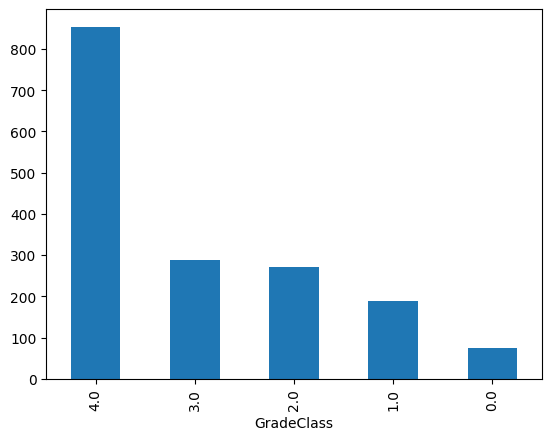

In [16]:
df['GradeClass'].value_counts().plot(kind='bar')

Because this does not look like a normal distribution and our response variable is not binary, we will need to train a multi class logistic regression model to calculate the probability that each repsonse will fit in one of these classes to determine which class each submission will fall into.

<Axes: >

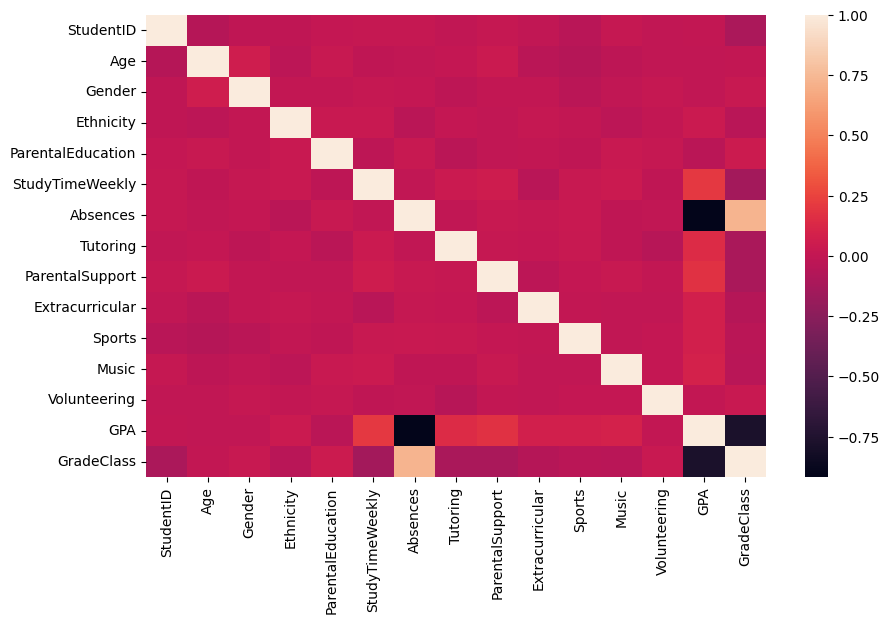

In [18]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr())


Seeing GPA and Absenses as the strongest indicators of Grade Class. Also seeing potential multicollienarity between Absenses and GPA to investigate. Study time, tutoring, and parental support also look like potential indicators of GradeClass.

In [20]:
df = pd.get_dummies(df, drop_first=True)

In [22]:
X = df.drop("GradeClass", axis=1)
y = df["GradeClass"]

Apply a scaler for the variables because we have so many and they all have different ranges and distributions

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**Train the multiclass logistic regression model**

Using the same sample size and random seed from last week's regression homework btu can adjust if needed.

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [25]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=1000)
model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [26]:
y_pred = model.predict(X_val)

Accuracy is 0.7283582089552239
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        15
         1.0       0.50      0.53      0.51        38
         2.0       0.54      0.67      0.60        54
         3.0       0.62      0.46      0.53        57
         4.0       0.88      0.95      0.91       171

    accuracy                           0.73       335
   macro avg       0.51      0.52      0.51       335
weighted avg       0.70      0.73      0.71       335



<Axes: >

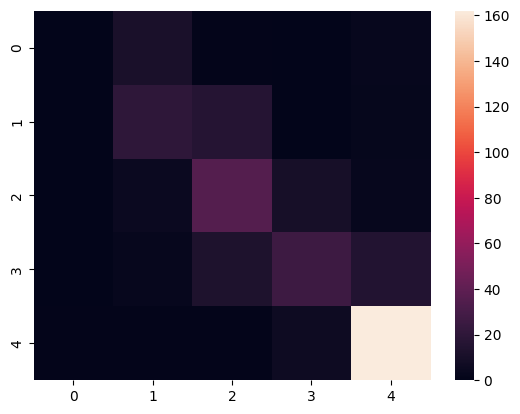

In [27]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy is", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))
sns.heatmap(confusion_matrix(y_val, y_pred))

**Assessing model performance on test data set**

In [28]:
test_df = pd.read_csv("student_performance_test_data.csv")
test_df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA
0,2005,15,1,2,4,0.135763,17,0,2,0,1,1,1,1.427724
1,1197,16,1,0,4,1.989925,0,0,1,1,0,0,1,3.117354
2,3343,15,0,0,0,10.588715,15,0,3,0,0,0,1,2.037769
3,2709,18,1,1,2,16.208658,1,0,3,1,0,0,0,3.548521
4,1436,18,0,0,0,3.576821,27,0,1,0,1,0,0,0.248977


need to adjust test file to have same exact format as training data

In [34]:
id_col = "StudentID"
target_col = "GradeClass"

In [36]:
has_labels = target_col in test_df.columns
y_test = test_df[target_col] if has_labels else None

In [37]:
cols_to_drop = [c for c in [id_col, target_col] if c in test_df.columns]
X_test_raw = test_df.drop(columns=cols_to_drop)

Create our new testing set

In [38]:
X_test = X_test_raw.reindex(columns=X_train.columns, fill_value=0)

Confrim same scaler as training set

In [39]:
try:
    X_test_input = scaler.transform(X_test)
except NameError:
    X_test_input = X_test

Predict!!!!

In [40]:
y_test_pred = model.predict(X_test_input)
proba = None
if hasattr(model, "predict_proba"):
    proba = model.predict_proba(X_test_input)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [46]:
results = pd.DataFrame({
    id_col: test_df[id_col],
    "PredictedGradeClass": y_test_pred
})
display(results.head(10))

,StudentID,PredictedGradeClass
0,2005,4.0
1,1197,2.0
2,3343,4.0
3,2709,0.0
4,1436,4.0
5,1322,0.0
6,2473,1.0
7,2704,1.0
8,1901,0.0
9,2058,4.0


## Creating a Submission File

Now that you'be created your model, you'll turn in predictions for the students listed in ```student_performance_test_data.csv```. You will make your grade predictions with your model and then output a dataframe that looks something like this:

|StudentID|PredictedGrade|
|---------|--------------|
|1001     |2             |
|1002     |1             |
|1003     |4             |

Finally, you'll use the [```DataFrame.to_csv()``` method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_csv.html) to save the dataframe to a CSV file. You need to make sure the index parameter is set to False, otherwise you will add an extra column to our CSV.

In [54]:
submission.to_csv("student_submission.csv", index=False)
print("Submission file saved as student_submission.csv")

Submission file saved as student_submission.csv


## Open Questions
1. **Model Evaluation**: Which evaluation metric (accuracy, precision, recall, F1-score, ROC-AUC) is most important for this student performance prediction problem? Justify your answer.
2. **Feature Importance**: Which feature in your model is most important for predicting student grade classes, and why?
3. **More Data**: Based on your modeling work so far, what other data points do you think will improve model accuracy? And, are there any user data points you would hesitate to use in a real-world scenario?


1. While typically accuracy is the most important, because there is an imbalance of students in each Grade Class, I believe and F score is the best. As we applied a scaler and fit all the predictors, an F statisctic is the best measure of both accuracy and precision.
2. GPA appeared to be the most important feature, which matches my initial hypothesis from EDA.
3. Exam scores could definitely help, as well as homework submission rate.

## THE END, WELL DONE!

## Submission

Download completed **Week8_MultiClassLogisticRegression_Homework.py** and **output.csv** and commit to your Github repo you shared with the faculty.